In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('UserEngagementSurvey.xlsx')
data.head()

,Timestamp,"By clicking 'I agree' below, you are indicating that you have read and understood this consent form and agree to participate in this research study. If you are under 18 years old, you confirm that you have obtained parental or guardian consent to participate.",What is your age?,What is your gender?,What is your occupation?,How often do you use the internet?,Which device do you primarily use to access the internet?,What is your main reason for using the internet?,What types of Malaysian web platforms do you frequently visit?,How often do you interact with online shopping on websites?,How often do you interact with reading articles on websites?,How often do you interact with watching videos on websites?,How often do you interact with participating in online discussions on websites?,How often do you interact with social media integration on websites?,"How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')","How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very Unlikely' and 5 is 'Very Likely')","How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is 'Not Accessible at All' and 5 is 'Very Accessible')","How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Never Successful' and 5 is 'Always Successful')",What improvements would you suggest for Malaysian web platforms to enhance your experience?,Are there any additional features you would like to see implemented on Malaysian web platforms?
0,2024/12/24 11:33:49 AM GMT+8,Agree,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,2024/12/24 11:33:49 AM GMT+8,Agree,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,2024/12/24 11:33:49 AM GMT+8,Agree,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,2024/12/24 11:33:49 AM GMT+8,Agree,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,2024/12/24 11:33:49 AM GMT+8,Agree,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [3]:
# data cleaning and preparation

columns_to_drop=[0,1] # index positions of 'timestamp' and terms
data=data.drop(data.columns[columns_to_drop],axis=1)

In [4]:
print('\nDataset after dropping columns by index positions:')
data.head()


Dataset after dropping columns by index positions:


,What is your age?,What is your gender?,What is your occupation?,How often do you use the internet?,Which device do you primarily use to access the internet?,What is your main reason for using the internet?,What types of Malaysian web platforms do you frequently visit?,How often do you interact with online shopping on websites?,How often do you interact with reading articles on websites?,How often do you interact with watching videos on websites?,How often do you interact with participating in online discussions on websites?,How often do you interact with social media integration on websites?,"How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')","How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very Unlikely' and 5 is 'Very Likely')","How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is 'Not Accessible at All' and 5 is 'Very Accessible')","How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Never Successful' and 5 is 'Always Successful')",What improvements would you suggest for Malaysian web platforms to enhance your experience?,Are there any additional features you would like to see implemented on Malaysian web platforms?
0,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [5]:
data.columns

Index(['What is your age?', 'What is your gender?', 'What is your occupation?',
       'How often do you use the internet?',
       'Which device do you primarily use to access the internet?',
       'What is your main reason for using the internet?',
       'What types of Malaysian web platforms do you frequently visit?',
       'How often do you interact with online shopping on websites?',
       'How often do you interact with reading articles on websites?',
       'How often do you interact with watching videos on websites?',
       'How often do you interact with participating in online discussions on websites?',
       'How often do you interact with social media integration on websites?',
       'How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied') ',
       'How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very U

In [6]:
# renameing the column names

data.rename(columns={
    'What is your age?':'age'
},inplace=True)

In [7]:
data.rename(columns= {
    'What is your gender?':'gender',
    'What is your occupation?':'occupation',
    'How often do you use the internet?':'internet_usage',
    'Which device do you primarily use to access the internet?':'device',
    'What is your main reason for using the internet?':'reason',
    'What types of Malaysian web platforms do you frequently visit?':'webplatform_types',
    'How often do you interact with online shopping on websites?':'for_online_shopping',
    'How often do you interact with reading articles on websites?':'for_reading_articles',
    'How often do you interact with watching videos on websites?':'for_watching_videos',
    'How often do you interact with participating in online discussions on websites?':'for_online_discussions',
    'How often do you interact with social media integration on websites?':'social_media_integration',
    "How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')":'overall_experience',
    'How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is \'Very Unlikely\' and 5 is \'Very Likely\')':'will_recommend',
    'How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is \'Not Accessible at All\' and 5 is \'Very Accessible\')':'accessiblity_for_disable',
    'How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is \'Never Successful\' and 5 is \'Always Successful\')':'rating_for_finding_needs',
    "What improvements would you suggest for Malaysian web platforms to enhance your experience? ":'improvements',
    'Are there any additional features you would like to see implemented on Malaysian web platforms?':'additional_features'
    
},inplace=True)

In [8]:
data.head(50)

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,"How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')",will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN
5,Under 18,Female,Employed,Daily,Desktop,Education,E-commerce,5 (Always),3,2,4,3,5,3,4,2,NaN,NaN
6,25 - 34,Female,Self-employed,Once a month,Desktop,Education,Educational sites,5 (Always),4,4,4,2,4,3,2,4,NaN,NaN
7,65 and above,Female,Unemployed,Once a month,Tablet,Social Media,Government services,3,3,1 (Never),3,3,3,2,4,3,NaN,NaN
8,55 - 64,Female,Unemployed,Several times a week,Laptop,Entertainment,News portals,2,4,4,3,4,1,1,3,5,NaN,NaN
9,45 - 54,Male,Retired,Several times a month,Desktop,Entertainment,Forums,2,2,4,2,3,5,3,3,3,NaN,NaN


In [9]:
data.rename(columns={
    "How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied') ":'overall_experience',
},inplace=True)

In [10]:
data.head(5)

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,overall_experience,will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [11]:
# Replacing column values in a pandas DataFrame
data.age.value_counts()

age
25 - 34         31
45 - 54         27
55 - 64         26
18 - 24         20
Under 18        18
35 - 44         18
65 and above    11
Name: count, dtype: int64

In [12]:
data['age'] = data['age'].map({'Under 18': '0-18', '18 - 24': '18-24','25 - 34':'25-34','35 - 44':'35-44',
                               '45 - 54':'45-54',
                               '55 - 64':'55-64',
                              '65 and above':'65-100'})

In [13]:
data.age.value_counts().sort_index()

age
0-18      18
18-24     20
25-34     31
35-44     18
45-54     27
55-64     26
65-100    11
Name: count, dtype: int64

In [14]:
data['for_online_shopping'].value_counts()

for_online_shopping
4             42
2             38
3             36
1 (Never)     18
5 (Always)    17
Name: count, dtype: int64

In [15]:
data['for_online_shopping'].map(type)

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
           ...      
146    <class 'int'>
147    <class 'str'>
148    <class 'int'>
149    <class 'str'>
150    <class 'int'>
Name: for_online_shopping, Length: 151, dtype: object

In [16]:
data['for_online_shopping'] = data['for_online_shopping'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , '5 (Always)':5})
data['for_reading_articles'] = data['for_reading_articles'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , '5 (Always)':5})
data['for_watching_videos'] = data['for_watching_videos'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , 5:5})
data['social_media_integration'] = data['social_media_integration'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , 5:5})

In [17]:
data.head()

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,overall_experience,will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,0-18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1,1,3,2,4,4,3,2,NaN,NaN
1,25-34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55-64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55-64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65-100,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [18]:
# missing values
data.isnull().sum()


age                          0
gender                       0
occupation                   0
internet_usage               0
device                       0
reason                       0
webplatform_types            0
for_online_shopping          0
for_reading_articles         0
for_watching_videos          0
for_online_discussions       0
social_media_integration     0
overall_experience           0
will_recommend               0
accessiblity_for_disable     0
rating_for_finding_needs     0
improvements                39
additional_features         39
dtype: int64

In [19]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

additional_features         25.827815
improvements                25.827815
gender                       0.000000
rating_for_finding_needs     0.000000
accessiblity_for_disable     0.000000
will_recommend               0.000000
overall_experience           0.000000
social_media_integration     0.000000
for_online_discussions       0.000000
age                          0.000000
for_reading_articles         0.000000
for_online_shopping          0.000000
webplatform_types            0.000000
reason                       0.000000
device                       0.000000
internet_usage               0.000000
occupation                   0.000000
for_watching_videos          0.000000
dtype: float64

In [20]:
# additional features & improvements has missing values
data['additional_features'].fillna(value='Not mentioned',inplace=True)
data['improvements'].fillna(value='Not mentioned',inplace=True)

In [21]:
data.isnull().sum()

age                         0
gender                      0
occupation                  0
internet_usage              0
device                      0
reason                      0
webplatform_types           0
for_online_shopping         0
for_reading_articles        0
for_watching_videos         0
for_online_discussions      0
social_media_integration    0
overall_experience          0
will_recommend              0
accessiblity_for_disable    0
rating_for_finding_needs    0
improvements                0
additional_features         0
dtype: int64

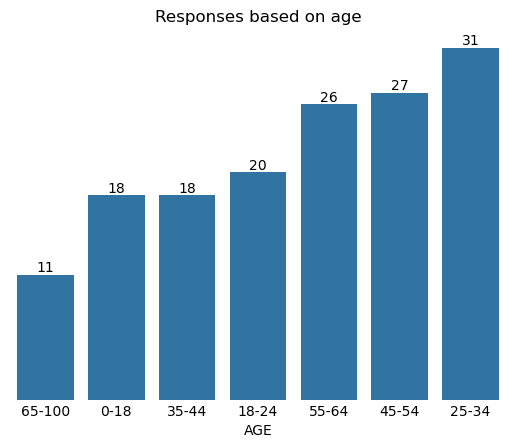

In [22]:
# data analysis using visulization
age = data['age'].value_counts(ascending=True)
chart= sns.barplot(x=age.index, y=age.values, order=age.index) 
chart.set(xlabel='AGE', yticks=[], title='Responses based on age', frame_on=False) 
chart.tick_params(length=0)                              
chart.bar_label(chart.containers[0])
plt.show()

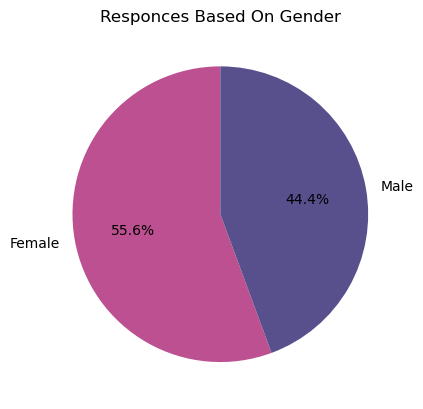

In [23]:
# responce based on gender
colors=['#BC5090','#58508D']
data.groupby('gender').size().plot(kind='pie',colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Responces Based On Gender')
plt.show()

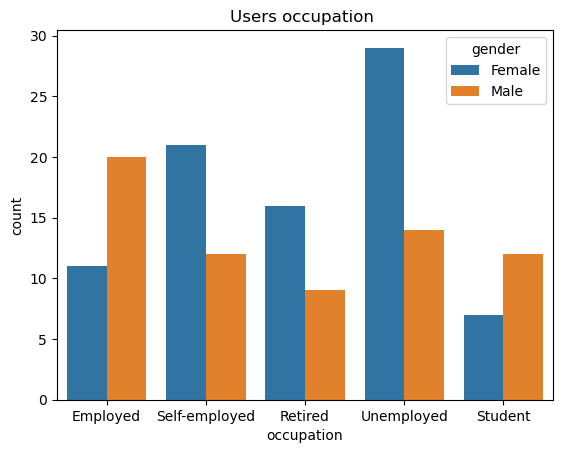

In [24]:
# occupation of user
sns.countplot(x='occupation',hue='gender',data=data)
plt.title('Users occupation ')
plt.show()

In [25]:
# internet usage of users
data['internet_usage'].value_counts()

internet_usage
Several times a month    37
Once a month             35
Once a week              29
Several times a week     19
Rarely                   17
Daily                    14
Name: count, dtype: int64

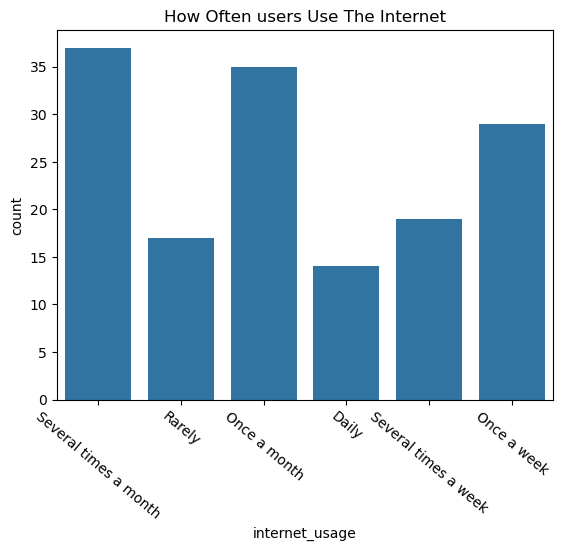

In [26]:
sns.countplot(x='internet_usage',data=data)
plt.title('How Often users Use The Internet')
plt.xticks(rotation=-40)
plt.show()

In [27]:
data['device'].value_counts()

device
Laptop        61
Tablet        43
Desktop       27
Smartphone    20
Name: count, dtype: int64

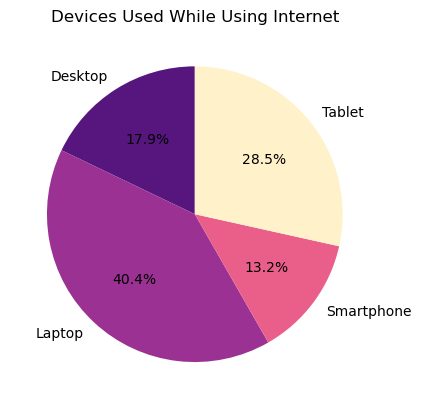

In [28]:
# devices used while accesing internet
colors=['#57167E','#9B3192','#EA5F89','#FFF1C9']
data.groupby('device').size().plot(kind='pie',colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Devices Used While Using Internet')
plt.show()

In [29]:
data.columns

Index(['age', 'gender', 'occupation', 'internet_usage', 'device', 'reason',
       'webplatform_types', 'for_online_shopping', 'for_reading_articles',
       'for_watching_videos', 'for_online_discussions',
       'social_media_integration', 'overall_experience', 'will_recommend',
       'accessiblity_for_disable', 'rating_for_finding_needs', 'improvements',
       'additional_features'],
      dtype='object')

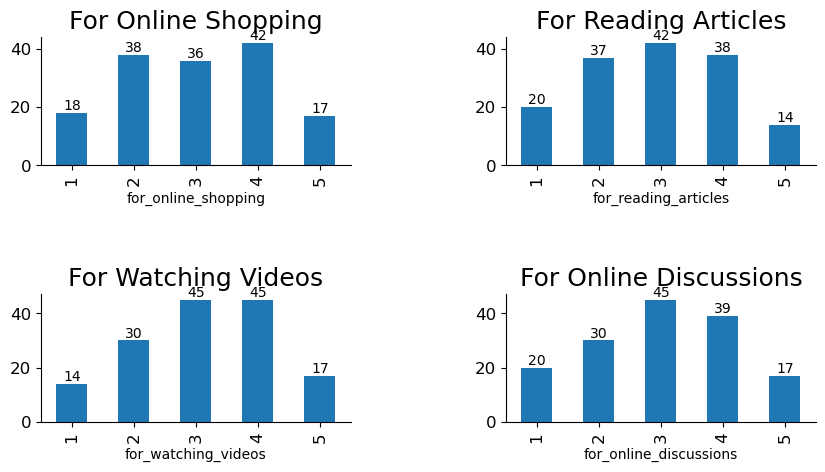

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 5))
data['for_online_shopping'].value_counts().sort_index().plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("For Online Shopping", fontsize=18)
axarr[0][0].bar_label(axarr[0][0].containers[0])
data['for_reading_articles'].value_counts().sort_index().plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("For Reading Articles", fontsize=18)
axarr[0][1].bar_label(axarr[0][1].containers[0])
data['for_watching_videos'].value_counts().sort_index().plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("For Watching Videos", fontsize=18)
axarr[1][0].bar_label(axarr[1][0].containers[0])
data['for_online_discussions'].value_counts().sort_index().plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("For Online Discussions", fontsize=18)
axarr[1][1].bar_label(axarr[1][1].containers[0])
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [31]:
data.head(50)

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,overall_experience,will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,0-18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1,1,3,2,4,4,3,2,Not mentioned,Not mentioned
1,25-34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,Not mentioned,Not mentioned
2,55-64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,Not mentioned,Not mentioned
3,55-64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,Not mentioned,Not mentioned
4,65-100,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,Not mentioned,Not mentioned
5,0-18,Female,Employed,Daily,Desktop,Education,E-commerce,5,3,2,4,3,5,3,4,2,Not mentioned,Not mentioned
6,25-34,Female,Self-employed,Once a month,Desktop,Education,Educational sites,5,4,4,4,2,4,3,2,4,Not mentioned,Not mentioned
7,65-100,Female,Unemployed,Once a month,Tablet,Social Media,Government services,3,3,1,3,3,3,2,4,3,Not mentioned,Not mentioned
8,55-64,Female,Unemployed,Several times a week,Laptop,Entertainment,News portals,2,4,4,3,4,1,1,3,5,Not mentioned,Not mentioned
9,45-54,Male,Retired,Several times a month,Desktop,Entertainment,Forums,2,2,4,2,3,5,3,3,3,Not mentioned,Not mentioned


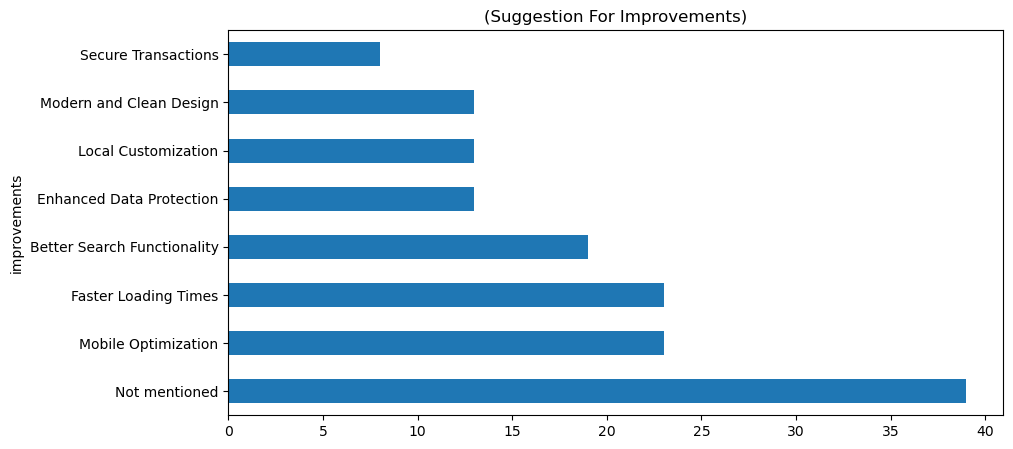

In [32]:

fig, axarr = plt.subplots(1, 1, figsize=(10, 5))
axarr=data['improvements'].value_counts().plot.barh(ax=axarr, fontsize=10)
plt.title('(Suggestion For Improvements)')

plt.show()

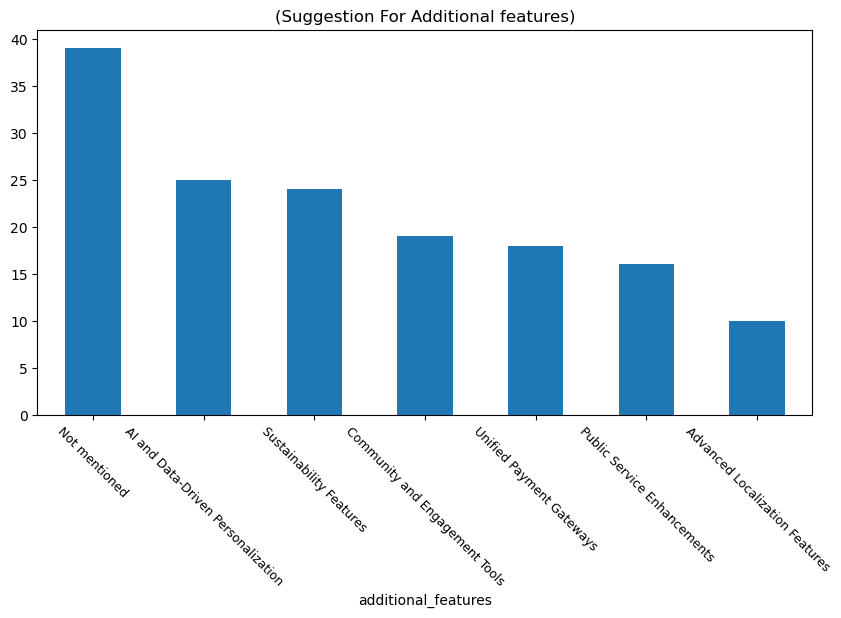

In [33]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 5))
axarr=data['additional_features'].value_counts().plot.bar(ax=axarr, fontsize=10)
plt.title('(Suggestion For Additional features)')
plt.xticks(rotation=-45,fontsize=9)

plt.show()

In [76]:
data['overall_experience'].value_counts()

overall_experience
4    45
3    35
2    32
5    23
1    16
Name: count, dtype: int64

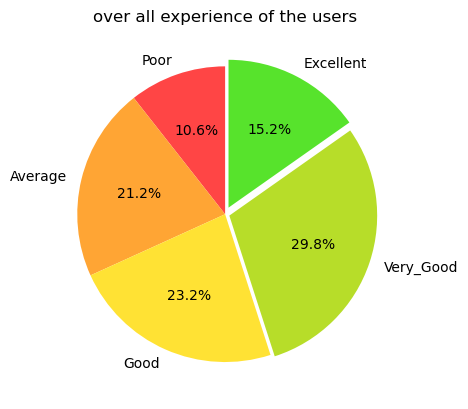

In [106]:
colors=['#ff4545','#ffa534','#ffe234','#b7dd29','#57e32c']
explode = [0, 0, 0, 0.03, 0.05]
ratings = ['Poor', 'Average', 'Good', 'Very_Good', 'Excellent']
data.groupby('overall_experience').size().plot(kind='pie',colors=colors,explode=explode,labels=ratings,autopct='%1.1f%%',startangle=90)

plt.title('over all experience of the users')
plt.show()